In [24]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import math

In [21]:
#@markdown We implemented some functions to visualize the gesture recognition results. <br/> Run the following cell to activate the functions.
from matplotlib import pyplot as plt
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.labelbottom': False,
    'xtick.bottom': False,
    'ytick.labelleft': False,
    'ytick.left': False,
    'xtick.labeltop': False,
    'xtick.top': False,
    'ytick.labelright': False,
    'ytick.right': False
})

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


def display_one_image(image, title, subplot, titlesize=16):
    """Displays one image along with the predicted category name and score."""
    plt.subplot(*subplot)
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize), color='black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)


def display_batch_of_images_with_gestures_and_hand_landmarks(images, results):
    """Displays a batch of images with the gesture category and its score along with the hand landmarks."""
    # Images and labels.
    images = [image.numpy_view() for image in images]
    gestures = [top_gesture for (top_gesture, _) in results]
    multi_hand_landmarks_list = [multi_hand_landmarks for (_, multi_hand_landmarks) in results]

    # Auto-squaring: this will drop data that does not fit into square or square-ish rectangle.
    rows = int(math.sqrt(len(images)))
    cols = len(images) // rows

    # Size and spacing.
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols, 1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))

    # Display gestures and hand landmarks.
    for i, (image, gestures) in enumerate(zip(images[:rows*cols], gestures[:rows*cols])):
        title = f"{gestures.category_name} ({gestures.score:.2f})"
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols) * 40 + 3
        annotated_image = image.copy()

        for hand_landmarks in multi_hand_landmarks_list[i]:
          hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
          hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
          ])

          mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks_proto,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

        subplot = display_one_image(annotated_image, title, subplot, titlesize=dynamic_titlesize)

    # Layout.
    plt.tight_layout()
    plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

In [22]:
# STEP 2: Create an GestureRecognizer object.
base_options = python.BaseOptions(model_asset_path='gesture_recognizer.task')
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer = vision.GestureRecognizer.create_from_options(options)

E0000 00:00:1700601071.506264   15782 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
I0000 00:00:1700601071.506388   15782 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
W0000 00:00:1700601071.507145   15782 gesture_recognizer_graph.cc:129] Hand Gesture Recognizer contains CPU only ops. Sets HandGestureRecognizerGraph acceleration to Xnnpack.
I0000 00:00:1700601071.509609   15782 hand_gesture_recognizer_graph.cc:250] Custom gesture classifier is not defined.
E0000 00:00:1700601071.516199   15782 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1700601071.516234   15782 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu

In [18]:
import os
# imglist = os.listdir("images")
# new_list = []
# for p in imglist:
#     new_list.append("images/" + imglist[i])
# print(new_list)

In [28]:
IMAGE_FILENAMES = ['images/'+p for p in os.listdir("images")]
IMAGE_FILENAMES

['images/E.jpg',
 'images/F.jpg',
 'images/B.jpg',
 'images/A.jpg',
 'images/D.jpg',
 'images/C.jpg']

GestureRecognizerResult(gestures=[[Category(index=-1, score=0.898116946220398, display_name='', category_name='None')]], handedness=[[Category(index=0, score=0.9913480877876282, display_name='Right', category_name='Right')]], hand_landmarks=[[NormalizedLandmark(x=0.3573058545589447, y=0.5822771191596985, z=5.0481311575367727e-08, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4311826527118683, y=0.5875107645988464, z=-0.015993723645806313, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4970417618751526, y=0.527961015701294, z=-0.019142640754580498, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.525316059589386, y=0.46983787417411804, z=-0.024377044290304184, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.49767640233039856, y=0.4409959018230438, z=-0.029071690514683723, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.48011618852615356, y=0.4080390930175781, z=-0.010790093801915646, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.49762028455734253,

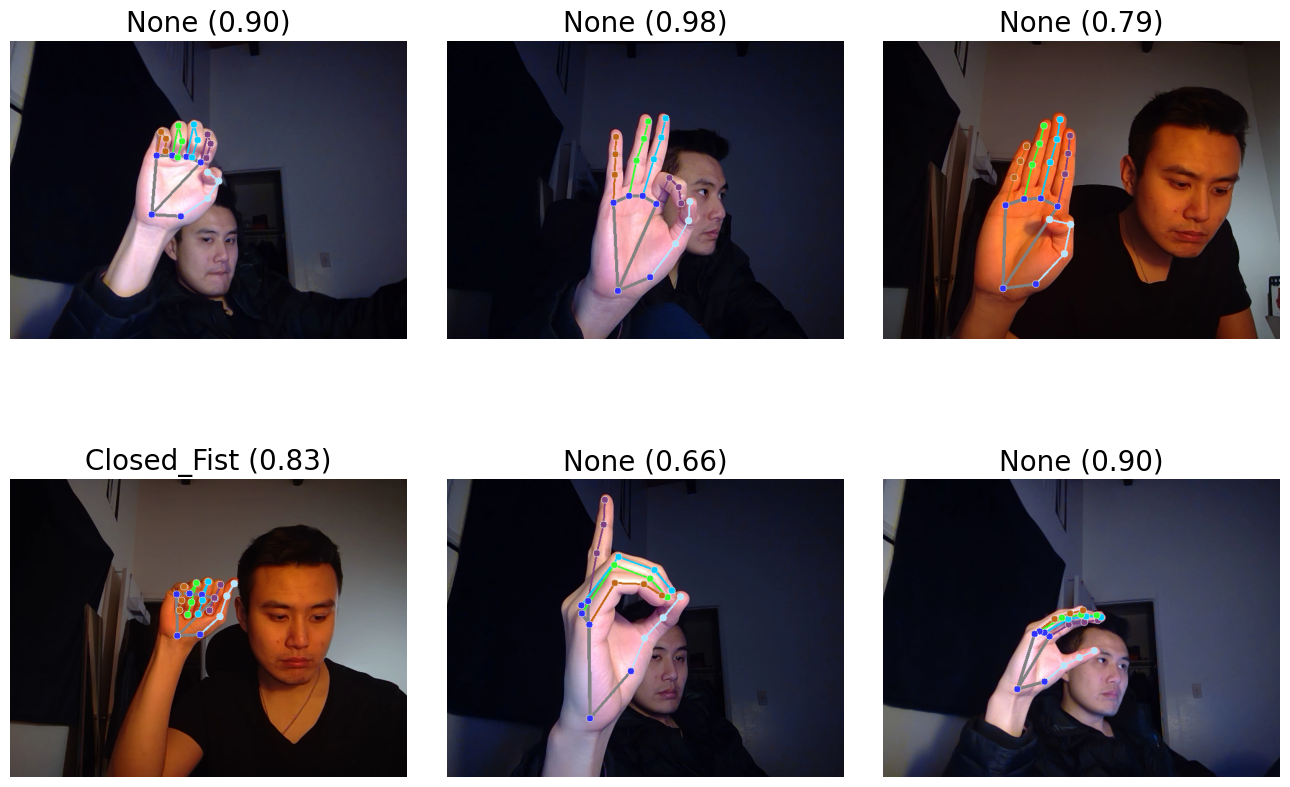

In [29]:
images = []
results = []
for image_file_name in IMAGE_FILENAMES:
  # STEP 3: Load the input image.
  image = mp.Image.create_from_file(image_file_name)

  # STEP 4: Recognize gestures in the input image.
  recognition_result = recognizer.recognize(image)
  print(recognition_result)
  # STEP 5: Process the result. In this case, visualize it.
  images.append(image)
  top_gesture = recognition_result.gestures[0][0]
  hand_landmarks = recognition_result.hand_landmarks
  results.append((top_gesture, hand_landmarks))

display_batch_of_images_with_gestures_and_hand_landmarks(images, results)